In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [5]:
#load data

df = pd.read_csv(r"C:\Users\bryan\Desktop\Computer Stuff\New_Data_Science_Class\DATA\hearing_test.csv")

In [6]:
df.head()

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1


In [7]:
df.isnull().sum()

age               0
physical_score    0
test_result       0
dtype: int64

In [8]:
len(df)

5000

In [9]:
df.describe()

,age,physical_score,test_result
count,5000.000000,5000.000000,5000.000000
mean,51.609000,32.760260,0.600000
std,11.287001,8.169802,0.489947
min,18.000000,-0.000000,0.000000
25%,43.000000,26.700000,0.000000
50%,51.000000,35.300000,1.000000
75%,60.000000,38.900000,1.000000
max,90.000000,50.000000,1.000000


In [10]:
11.287001	8.169802	

SyntaxError: invalid syntax (<ipython-input-10-74474f98ef08>, line 1)

In [11]:
df['test_result'].value_counts()

1    3000
0    2000
Name: test_result, dtype: int64

<AxesSubplot:xlabel='test_result', ylabel='count'>

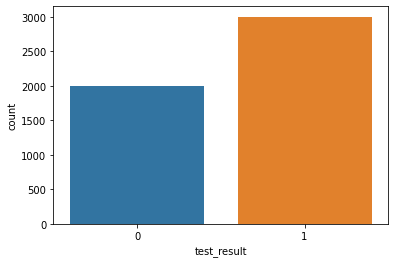

In [12]:
sns.countplot(data=df, x='test_result') 

<AxesSubplot:xlabel='test_result', ylabel='physical_score'>

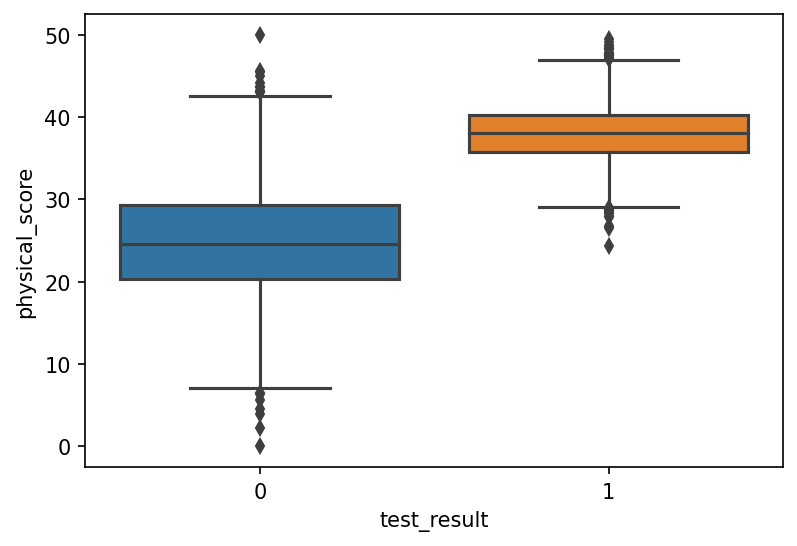

In [13]:
plt.figure(dpi=150)

sns.boxplot(x='test_result',y='physical_score',data=df)

<AxesSubplot:xlabel='age', ylabel='physical_score'>

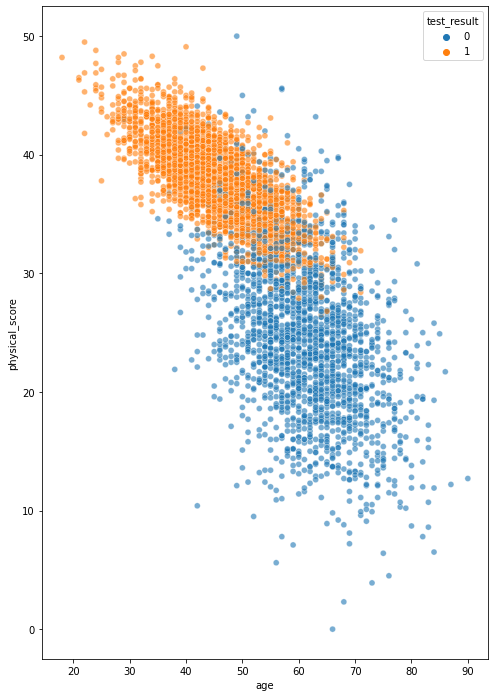

In [14]:
plt.figure(figsize=(8, 12))
sns.scatterplot(x='age',y='physical_score',data=df, 
                hue='test_result',alpha=.6)

<Figure size 576x864 with 0 Axes>

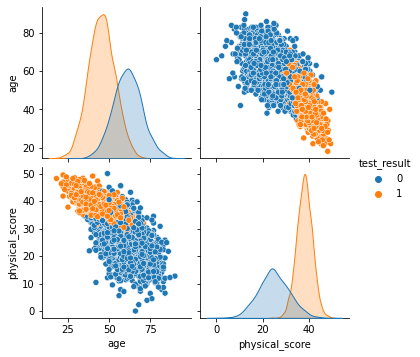

In [15]:
plt.figure(figsize=(8, 12))
sns.pairplot(df,hue='test_result')

<AxesSubplot:>

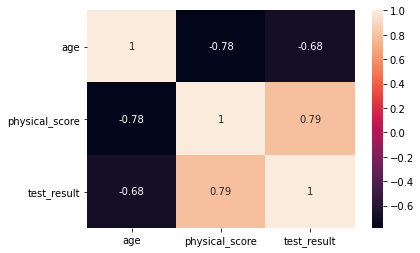

In [16]:
sns.heatmap(df.corr(), annot=True)

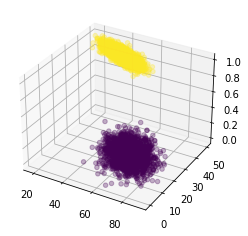

In [17]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['age'],df['physical_score'], 
           df['test_result'], 
           c=df['test_result'],
          alpha=0.3)

In [18]:
X = df.drop('test_result',axis=1)

In [19]:
y = df['test_result']

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [22]:
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [23]:
from sklearn.linear_model import LogisticRegression

In [24]:
log_model= LogisticRegression()

In [25]:
log_model.fit(scaled_X_train, y_train)

LogisticRegression()

In [26]:
log_model.coef_

array([[-0.94953524,  3.45991194]])

In [27]:
y_pred = log_model.predict(scaled_X_test)

In [28]:
y_pred

array([1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,

In [29]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [30]:
confusion_matrix(y_test, y_pred)

array([[172,  21],
       [ 14, 293]], dtype=int64)

In [31]:
from sklearn.metrics import plot_confusion_matrix

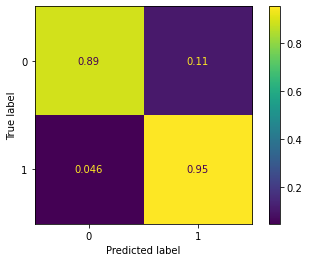

In [32]:
plot_confusion_matrix(log_model, scaled_X_test, y_test,
                     normalize='true')

In [33]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.89      0.91       193
           1       0.93      0.95      0.94       307

    accuracy                           0.93       500
   macro avg       0.93      0.92      0.93       500
weighted avg       0.93      0.93      0.93       500



In [34]:
accuracy_score(y_test, y_pred)

0.93

In [35]:
from sklearn.metrics import precision_score, recall_score

In [36]:
recall_score(y_test, y_pred)

0.9543973941368078

In [37]:
precision_score(y_test, y_pred)

0.9331210191082803

In [38]:
from sklearn.metrics import plot_precision_recall_curve, plot_roc_curve 

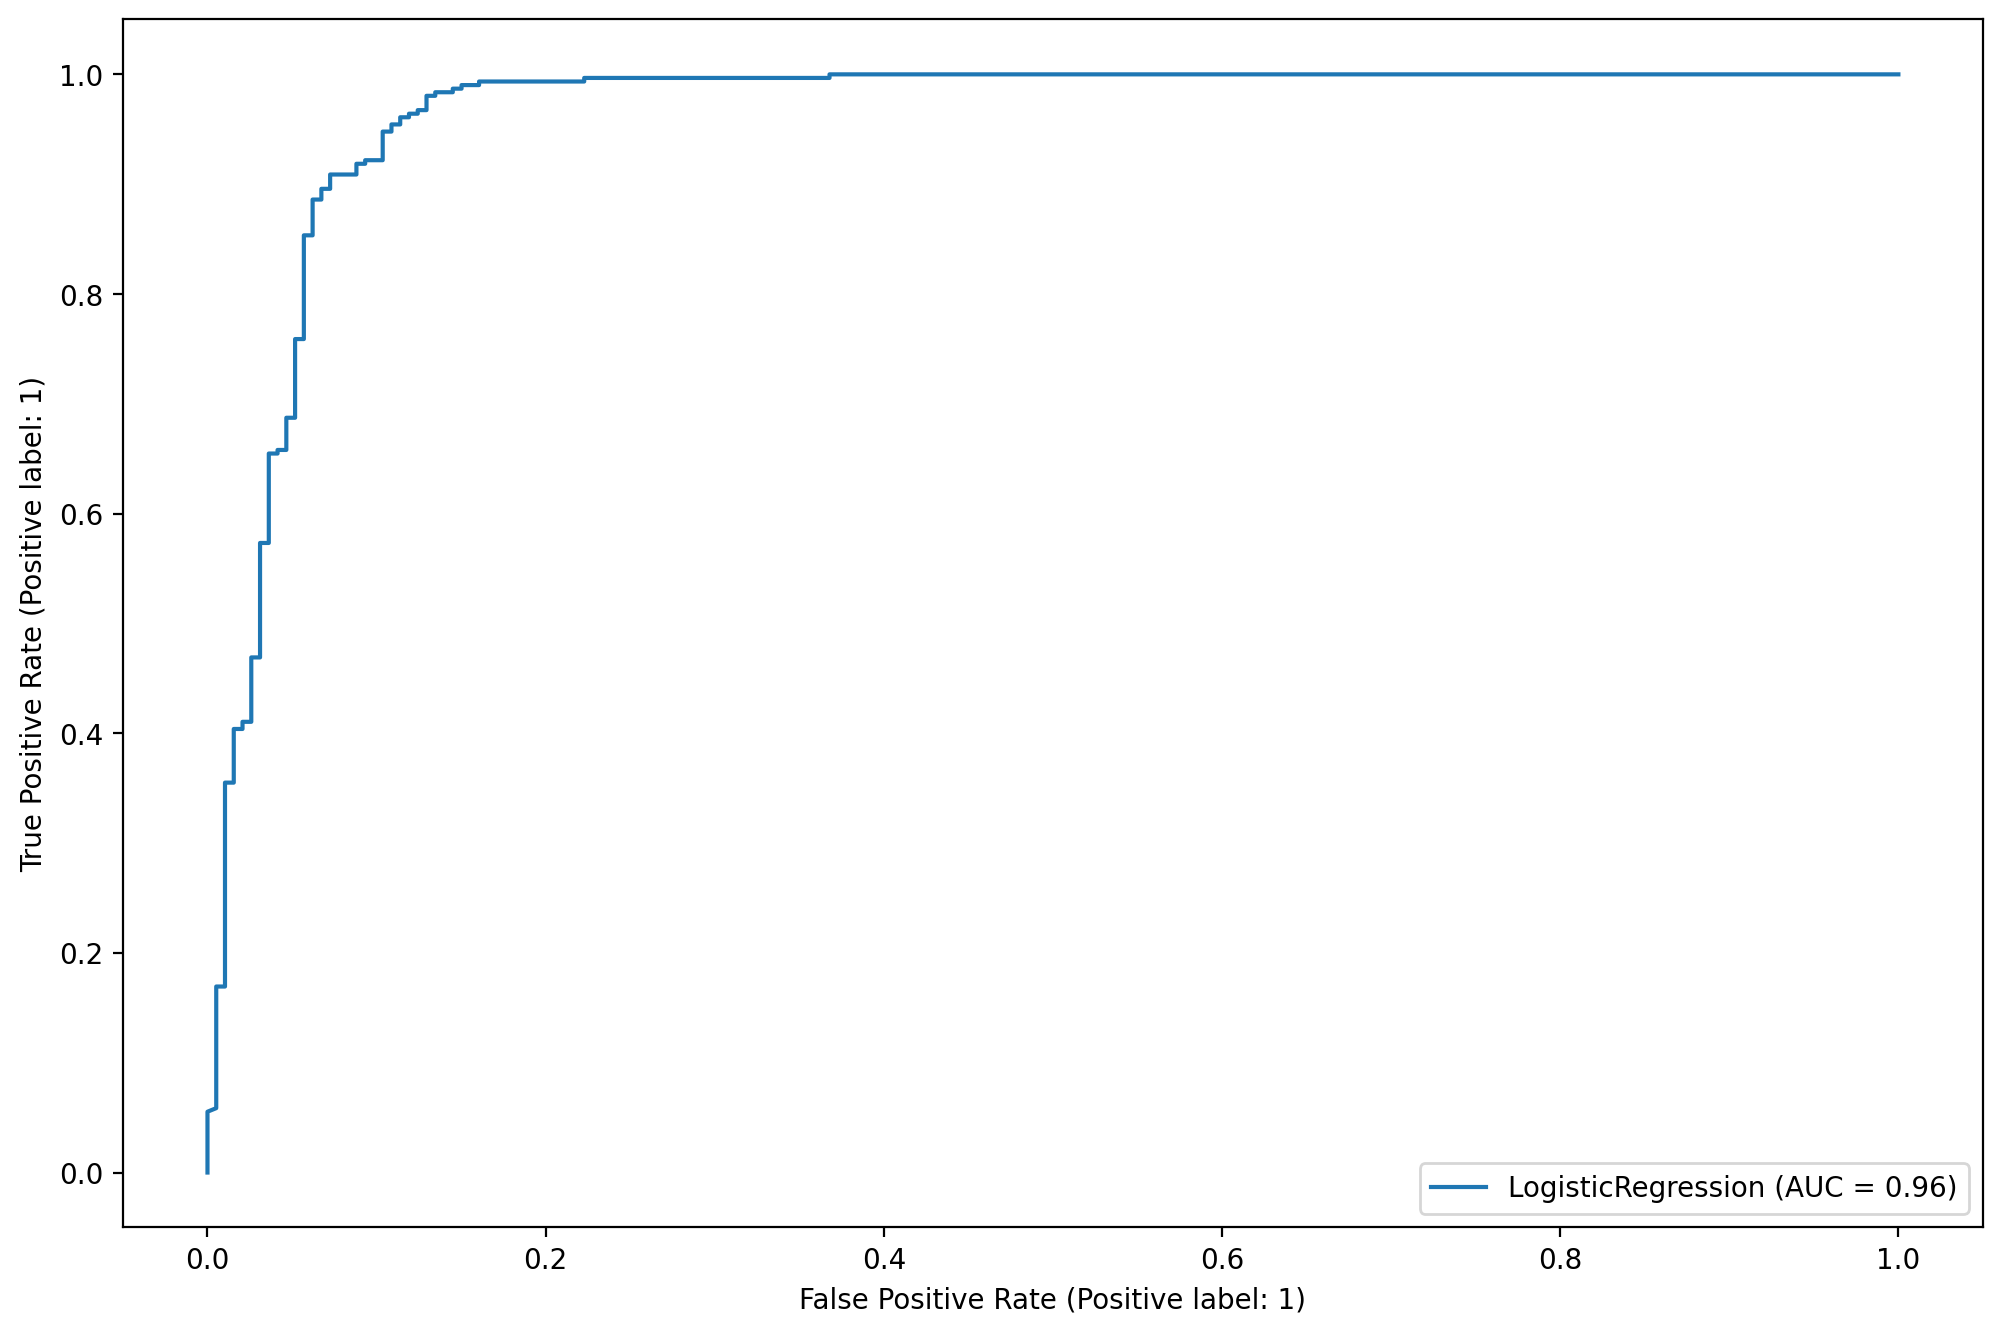

In [39]:
fig,ax = plt.subplots(figsize=(12,8), dpi=200)
    
plot_roc_curve(log_model, scaled_X_test, y_test, ax=ax)

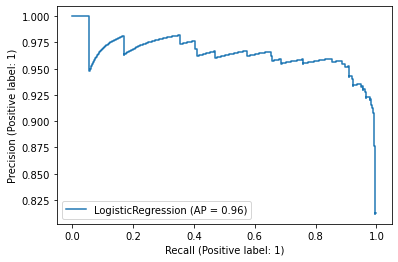

In [40]:
plot_precision_recall_curve(log_model, scaled_X_test, y_test)

In [41]:
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]

In [42]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

In [43]:
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

In [44]:
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, y_train)

In [45]:
grid_result.best_params_


{'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}

In [46]:
pred = grid_result.predict(X_test)

In [47]:
precision_score(y_test, pred)

0.9331210191082803